### Plot Diff-in-Diff for Florida, Texas, and Washington

In [1]:
%load_ext lab_black
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# # load mortality rate data

# fl_pre_policy_mortality = pd.read_csv(
#     "./fl_pre_policy_mortality.csv", sep=",", index_col=0
# )
# fl_post_policy_mortality = pd.read_csv(
#     "./fl_post_policy_mortality.csv", sep=",", index_col=0
# )
# tx_pre_policy_mortality = pd.read_csv(
#     "./tx_pre_policy_mortality.csv", sep=",", index_col=0
# )
# tx_post_policy_mortality = pd.read_csv(
#     "./tx_post_policy_mortality.csv", sep=",", index_col=0
# )
# wa_pre_policy_mortality = pd.read_csv(
#     "./wa_pre_policy_mortality.csv", sep=",", index_col=0
# )
# wa_post_policy_mortality = pd.read_csv(
#     "./wa_post_policy_mortality.csv", sep=",", index_col=0
# )
# mortality_compare_to_fl = pd.read_csv(
#     "./mortality_comparisons_for_fl.csv", sep=",", index_col=0
# )
# mortality_compare_to_tx = pd.read_csv(
#     "./mortality_comparisons_for_tx.csv", sep=",", index_col=0
# )
# mortality_compare_to_wa = pd.read_csv(
#     "./mortality_comparisons_for_wa.csv", sep=",", index_col=0
# )

In [3]:
# # concatenate pre and post mortality rate data

# fl_mortality = pd.concat([fl_pre_policy_mortality, fl_post_policy_mortality])
# tx_mortality = pd.concat([tx_pre_policy_mortality, tx_post_policy_mortality])
# wa_mortality = pd.concat([wa_pre_policy_mortality, wa_post_policy_mortality])

In [4]:
# subset to dataframes with averaged mortality rate by year for each state

# fl_mortality_avg = fl_mortality.groupby(["Year"], as_index=False)[
#     "Mortality Rate"
# ].mean()
# tx_mortality_avg = tx_mortality.groupby(["Year"], as_index=False)[
#     "Mortality Rate"
# ].mean()
# wa_mortality_avg = wa_mortality.groupby(["Year"], as_index=False)[
#     "Mortality Rate"
# ].mean()

In [13]:
fl_mortality = pd.read_csv("./fl_mortality.csv", sep=",", index_col=0)
tx_mortality = pd.read_csv("./tx_mortality.csv", sep=",", index_col=0)
wa_mortality = pd.read_csv("./wa_mortality.csv", sep=",", index_col=0)

In [4]:
fl_mortality

,Year,State,County,Deaths,Population,Mortality Rate
0,2003,FL,Alachua County,11.0,227022.0,0.000048
1,2003,FL,Bay County,21.0,155044.0,0.000135
2,2003,FL,Brevard County,97.0,504847.0,0.000192
3,2003,FL,Broward County,230.0,1707543.0,0.000135
4,2003,FL,Citrus County,16.0,126215.0,0.000127
...,...,...,...,...,...,...
215,2015,FL,Seminole County,63.0,448318.0,0.000141
216,2015,FL,St. Johns County,17.0,226362.0,0.000075
217,2015,FL,St. Lucie County,51.0,297282.0,0.000172
218,2015,FL,Sumter County,12.0,117076.0,0.000102


In [5]:
mortality_compare_to_fl

,Year,County,Deaths,Population,State,Mortality Rate
0,2003,Pulaski County,18.0,365258.0,AR,0.000049
1,2004,Pulaski County,35.0,366608.0,AR,0.000095
2,2005,Benton County,10.0,186756.0,AR,0.000054
3,2005,Pulaski County,41.0,368274.0,AR,0.000111
4,2005,Saline County,10.0,93493.0,AR,0.000107
...,...,...,...,...,...,...
2270,2015,Sierra County,2.0,11236.0,NM,0.000178
2271,2015,Socorro County,5.0,17152.0,NM,0.000292
2272,2015,Taos County,7.0,32797.0,NM,0.000213
2273,2015,Torrance County,0.0,15596.0,NM,0.000000


In [6]:
mortality_compare_to_fl["County"].nunique()

159

In [10]:
# fl_mortality.groupby(["Year", "State", "County"], as_index=False)["Deaths"].mean()

In [9]:
# fl_mortality.groupby(["Year"])["Population"].sum()

In [7]:
# mortality_compare_to_fl["Mortality Rate"].describe()

In [8]:
# mortality_compare_to_fl.groupby(["Year"])["Population"].sum()

#### Florida

In [11]:
# seperate to pre and post policy periods for FL and comparison states (average of PA, AR, NM)

x_pre_fl = np.array(fl_mortality[fl_mortality["Year"] < 2010]["Year"])
y_pre_fl = np.array(fl_mortality[fl_mortality["Year"] < 2010]["Mortality Rate"])
x_post_fl = np.array(fl_mortality[fl_mortality["Year"] >= 2010]["Year"])
y_post_fl = np.array(fl_mortality[fl_mortality["Year"] >= 2010]["Mortality Rate"])

x_pre_comp = np.array(
    mortality_compare_to_fl[mortality_compare_to_fl["Year"] < 2010]["Year"]
)
y_pre_comp = np.array(
    mortality_compare_to_fl[mortality_compare_to_fl["Year"] < 2010]["Mortality Rate"]
)
x_post_comp = np.array(
    mortality_compare_to_fl[mortality_compare_to_fl["Year"] >= 2010]["Year"]
)
y_post_comp = np.array(
    mortality_compare_to_fl[mortality_compare_to_fl["Year"] >= 2010]["Mortality Rate"]
)

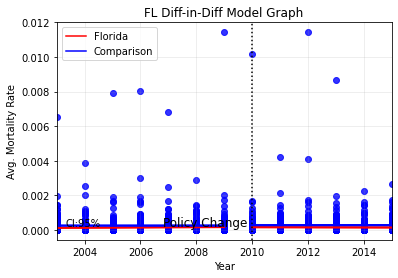

In [12]:
import warnings

warnings.filterwarnings("ignore")

fig, ax = plt.subplots()
# ax.plot(x_pre_fl, y_pre_fl, "o")
m, b = np.polyfit(x_pre_fl, y_pre_fl, 1)
plt.plot(x_pre_fl, m * x_pre_fl + b, color="red")
ax = sns.regplot(x_pre_fl, y_pre_fl, ci=95, color="r", scatter=False)

# ax.plot(x_post_fl, y_post_fl, "o")
m, b = np.polyfit(x_post_fl, y_post_fl, 1)
plt.plot(x_post_fl, m * x_post_fl + b, color="red", label="Florida")
ax = sns.regplot(x_post_fl, y_post_fl, ci=95, color="r", scatter=False)

# ax.plot(x_pre_comp, y_pre_comp, "o")
m, b = np.polyfit(x_pre_comp, y_pre_comp, 1)
plt.plot(x_pre_comp, m * x_pre_comp + b, color="blue")
sns.regplot(x_pre_comp, y_pre_comp, ci=95, color="b")

# ax.plot(x_post_comp, y_post_comp, "o")
m, b = np.polyfit(x_post_comp, y_post_comp, 1)
plt.plot(x_post_comp, m * x_post_comp + b, color="blue", label="Comparison")
sns.regplot(x_post_comp, y_post_comp, ci=95, color="b")

plt.xlabel("Year")
plt.ylabel("Avg. Mortality Rate")
plt.title("FL Diff-in-Diff Model Graph")
plt.axvline(x=2010, color="black", ls=":")
plt.text(2006.8, 0.00020, "Policy Change", fontsize=12)
plt.text(2003.3, 0.000212, "CI:95%", fontsize=10)
plt.grid(b=True, which="major", color="#999999", linestyle="-", alpha=0.2)

plt.legend(loc="upper left")
plt.show()

### Texas

In [13]:
# seperate to pre and post policy periods for TX and comparison states (average of CO, ID, MI)

x_pre_tx = np.array(tx_mortality[tx_mortality["Year"] < 2007]["Year"])
y_pre_tx = np.array(tx_mortality[tx_mortality["Year"] < 2007]["Mortality Rate"])
x_post_tx = np.array(tx_mortality[tx_mortality["Year"] >= 2007]["Year"])
y_post_tx = np.array(tx_mortality[tx_mortality["Year"] >= 2007]["Mortality Rate"])

x_pre_comp_tx = np.array(
    mortality_compare_to_tx[mortality_compare_to_tx["Year"] < 2007]["Year"]
)
y_pre_comp_tx = np.array(
    mortality_compare_to_tx[mortality_compare_to_tx["Year"] < 2007]["Mortality Rate"]
)
x_post_comp_tx = np.array(
    mortality_compare_to_tx[mortality_compare_to_tx["Year"] >= 2007]["Year"]
)
y_post_comp_tx = np.array(
    mortality_compare_to_tx[mortality_compare_to_tx["Year"] >= 2007]["Mortality Rate"]
)

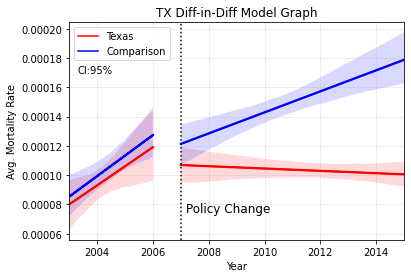

In [14]:
import warnings

warnings.filterwarnings("ignore")

fig, ax = plt.subplots()
# ax.plot(x_pre_tx, y_pre_tx, "o")
m, b = np.polyfit(x_pre_tx, y_pre_tx, 1)
plt.plot(x_pre_tx, m * x_pre_tx + b, color="red")
ax = sns.regplot(x_pre_tx, y_pre_tx, ci=95, color="r", scatter=False)

# ax.plot(x_post_tx, y_post_tx, "o")
m, b = np.polyfit(x_post_tx, y_post_tx, 1)
plt.plot(x_post_tx, m * x_post_tx + b, color="red", label="Texas")
ax = sns.regplot(x_post_tx, y_post_tx, ci=95, color="r", scatter=False)

# ax.plot(x_pre_comp_tx, y_pre_comp_tx, "o")
m, b = np.polyfit(x_pre_comp_tx, y_pre_comp_tx, 1)
plt.plot(x_pre_comp_tx, m * x_pre_comp_tx + b, color="blue")
ax = sns.regplot(x_pre_comp_tx, y_pre_comp_tx, ci=95, color="b", scatter=False)

# ax.plot(x_post_comp_tx, y_post_comp_tx, "o")
m, b = np.polyfit(x_post_comp_tx, y_post_comp_tx, 1)
plt.plot(x_post_comp_tx, m * x_post_comp_tx + b, color="blue", label="Comparison")
ax = sns.regplot(x_post_comp_tx, y_post_comp_tx, ci=95, color="b", scatter=False)

plt.xlabel("Year")
plt.ylabel("Avg. Mortality Rate")
plt.title("TX Diff-in-Diff Model Graph")
plt.axvline(x=2007, color="black", ls=":")
plt.text(2007.2, 0.000075, "Policy Change", fontsize=12)
plt.text(2003.3, 0.00017, "CI:95%", fontsize=10)
plt.grid(b=True, which="major", color="#999999", linestyle="-", alpha=0.2)

plt.legend(loc="upper left")
plt.show()

#### Washington

In [15]:
# seperate to pre and post policy periods for WA and comparison states (average of OR, CA, NV)

x_pre_wa = np.array(wa_mortality[wa_mortality["Year"] < 2012]["Year"])
y_pre_wa = np.array(wa_mortality[wa_mortality["Year"] < 2012]["Mortality Rate"])
x_post_wa = np.array(wa_mortality[wa_mortality["Year"] >= 2012]["Year"])
y_post_wa = np.array(wa_mortality[wa_mortality["Year"] >= 2012]["Mortality Rate"])

x_pre_comp_wa = np.array(
    mortality_compare_to_wa[mortality_compare_to_wa["Year"] < 2012]["Year"]
)
y_pre_comp_wa = np.array(
    mortality_compare_to_wa[mortality_compare_to_wa["Year"] < 2012]["Mortality Rate"]
)
x_post_comp_wa = np.array(
    mortality_compare_to_wa[mortality_compare_to_wa["Year"] >= 2012]["Year"]
)
y_post_comp_wa = np.array(
    mortality_compare_to_wa[mortality_compare_to_wa["Year"] >= 2012]["Mortality Rate"]
)

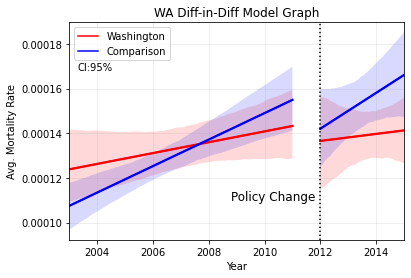

In [16]:
import warnings

warnings.filterwarnings("ignore")

fig, ax = plt.subplots()
# ax.plot(x_pre_wa, y_pre_wa, "o")
m, b = np.polyfit(x_pre_wa, y_pre_wa, 1)
plt.plot(x_pre_wa, m * x_pre_wa + b, color="red")
ax = sns.regplot(x_pre_wa, y_pre_wa, ci=95, color="r", scatter=False)

# ax.plot(x_post_wa, y_post_wa, "o")
m, b = np.polyfit(x_post_wa, y_post_wa, 1)
plt.plot(x_post_wa, m * x_post_wa + b, color="red", label="Washington")
ax = sns.regplot(x_post_wa, y_post_wa, ci=95, color="r", scatter=False)

# ax.plot(x_pre_comp_wa, y_pre_comp_wa, "o")
m, b = np.polyfit(x_pre_comp_wa, y_pre_comp_wa, 1)
plt.plot(x_pre_comp_wa, m * x_pre_comp_wa + b, color="blue")
ax = sns.regplot(x_pre_comp_wa, y_pre_comp_wa, ci=95, color="b", scatter=False)

# ax.plot(x_post_comp_wa, y_post_comp_wa, "o")
m, b = np.polyfit(x_post_comp_wa, y_post_comp_wa, 1)
plt.plot(x_post_comp_wa, m * x_post_comp_wa + b, color="blue", label="Comparison")
ax = sns.regplot(x_post_comp_wa, y_post_comp_wa, ci=95, color="b", scatter=False)

plt.xlabel("Year")
plt.ylabel("Avg. Mortality Rate")
plt.title("WA Diff-in-Diff Model Graph")
plt.axvline(x=2012, color="black", ls=":")
plt.text(2008.8, 0.00011, "Policy Change", fontsize=12)
plt.text(2003.3, 0.000168, "CI:95%", fontsize=10)
plt.grid(b=True, which="major", color="#999999", linestyle="-", alpha=0.2)

plt.legend(loc="best")
plt.show()